# 感知机

## 参考
[感知器](https://www.jiqizhixin.com/graph/technologies/f9849d6c-6262-4c1f-8f42-6d976be17161)

[感知机原理](https://www.cnblogs.com/huangyc/p/9706575.html)

---

## 定义

感知机是二分类的线性模型，其输入是实例的特征向量，输出的是事例的类别，分别是+1和-1，属于判别模型。

假设训练数据集是线性可分的，感知机学习的目标是求得一个能够将训练数据集正实例点和负实例点完全正确分开的分离超平面。如果是非线性可分的数据，则最后无法获得超平面。

<div align=center>
<img src="images/20240418160900.png" width="30%">
</div>

## 点到线的距离

公式中的直线方程为 $Ax + By + C = 0$，点P的坐标为 $(x_0, y_0)$。

$$
d = \frac{|Ax_0 + By_0 + C|}{\sqrt{A^2 + B^2}}
$$

## 点到超平面距离

我们假设超平面方程为 $w \cdot x + b$，其中w = $(w_0, w_1, \ldots, w_m)$，x = $(x_0, x_1, \ldots, x_m)$。样本点到超平面的距离公式：

$$
d = \frac{|w \cdot x + b|}{\|w\|}
$$

## 超平面（Hyperplanes）
超平面是在空间$R^d$中的一个子空间$R^{d-1}$

在2维空间中的超平面是一条线，在3维空间中的超平面是一个平面。

## 感知机模型

<div align=center>
<img src="images/20240418170610.png" width="30%">
</div>


感知机从输入空间到输出空间的模型如下:  
$$  
\begin{array}{c}  
f(x)=\operatorname{sign}(w \cdot x+b) \\  
\operatorname{sign}(x)=\left\{\begin{array}{ll}  
-1 & x<0 \\  
1 & x \geq 0  
\end{array}\right.  
\end{array}  
$$


下面展示基于感知机的分类模型代码，包含训练与预测


/tmp/ipykernel_72053/1696683232.py:71: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
/tmp/ipykernel_72053/1696683232.py:72: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')


Text(0, 0.5, 'sepal width')

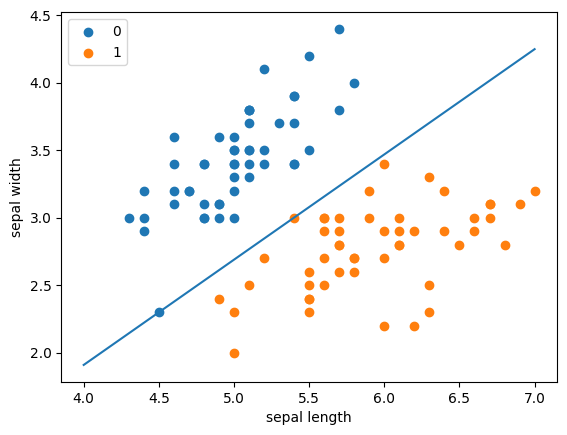

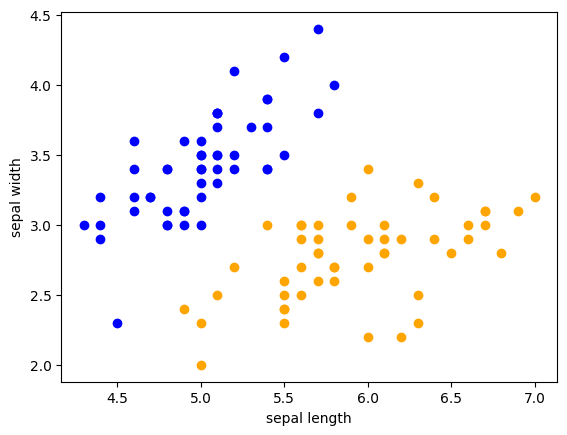

In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

# 加载鸢尾花数据集
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

# 重命名列名
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

# 查看标签数量
df.label.value_counts()

# 绘制散点图
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

# 准备数据
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])

# 感知机模型
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1

    '''
    x为输入数据
    w,b分别为模型权重和偏置
    '''
    def sign(self, x, w, b):
        y = np.dot(x, w) + b 
        return y

    # 随机梯度下降法训练感知机
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)): # 遍历所有训练样本
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0: # 负样本情况下，梯度下降
                    self.w = self.w + self.l_rate * np.dot(y, X)
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'

perceptron = Model()
perceptron.fit(X, y)

# 绘制分类直线
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)

# 绘制数据点
plt.figure()
plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
# plt.legend()

[[ 16.3 -24.2]]
[0.]


/tmp/ipykernel_72053/2223164542.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
/tmp/ipykernel_72053/2223164542.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')


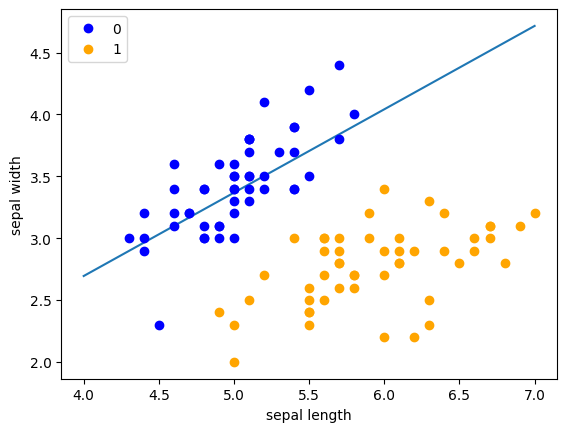

In [3]:
from sklearn.linear_model import Perceptron

clf = Perceptron(fit_intercept=False, max_iter=1000, shuffle=False)
clf.fit(X, y)
'''
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=False, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=False, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
'''

# Weights assigned to the features.
print(clf.coef_)
#[[ 16.3 -24.2]]

# 截距 Constants in decision function.
print(clf.intercept_)
#[0.]

x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()